<a href="https://colab.research.google.com/github/Glenap/AI-Odyssey-Deep-Dive-Into-Transformers-and-its-Applications/blob/main/231154_VikashYadav.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AI ODYSSSEY: CNN ASSIGNMENT

## CONVOLUTIONAL NEURAL NETWORKS

In this assignment, we'll first learn about the individual components of a CNN, and then build one!

### FILTERS

Filters are the most unique part of a CNN. They make the bulk of the convolutional layers of a CNN, and thus differentiate it from a normal neural network.

**Describe the following filters:**
- averaging filter:
- gaussian filter:
- median filter:
- unsharp masking:
- prewitt filter:
- sobel filter:
- laplacian filter:

**Now give an example of application of each of these filters. You are required to load an image of your choice. Then, apply these filters to those images and display the image before and after convolution.**


**Averaging Filter**

In [4]:
#ENTER YOUR CODE HERE
import cv2
import numpy as np
import matplotlib.pyplot as plt

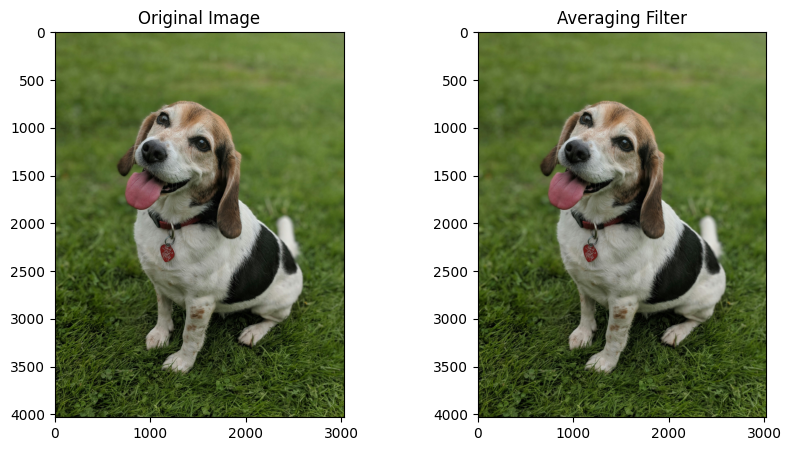

In [45]:
image_path = '/content/pexels-tyler-de-sousa-16869201-6599748.jpg'
image = cv2.imread(image_path)


def display_images(original, filtered, filter_name):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.axis('on')

    plt.subplot(1, 2, 2)
    plt.title(f'{filter_name} Filter')
    plt.imshow(cv2.cvtColor(filtered, cv2.COLOR_BGR2RGB))
    plt.axis('on')

    plt.show()


def apply_filter(image, filter_function, *args):
    channels = cv2.split(image)
    filtered_channels = [filter_function(channel, *args) for channel in channels]
    return cv2.merge(filtered_channels)


kernel_size = (5, 5)
average_filter = cv2.blur(image, kernel_size)
display_images(image, average_filter, 'Averaging')


**Gaussian Filter**

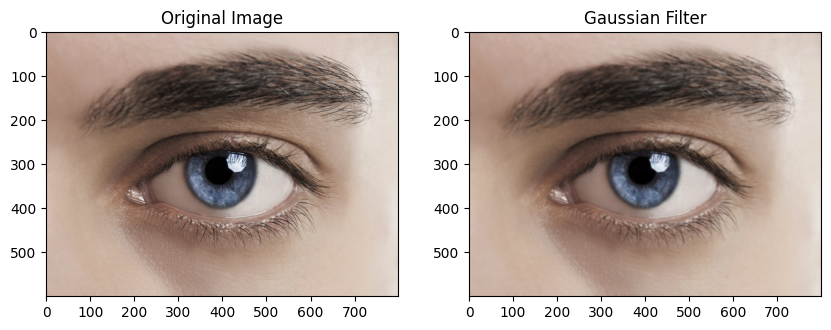

In [ ]:
#ENTER YOUR CODE HERE
image_path = '/content/UKVU6RwT7zgtCuLkQDRyKV.jpg'
image = cv2.imread(image_path)

gaussian_filter = cv2.GaussianBlur(image, kernel_size, 0)
display_images(image, gaussian_filter, 'Gaussian')


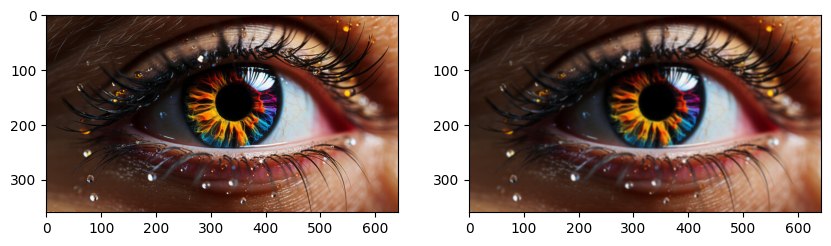

**Median Filter**

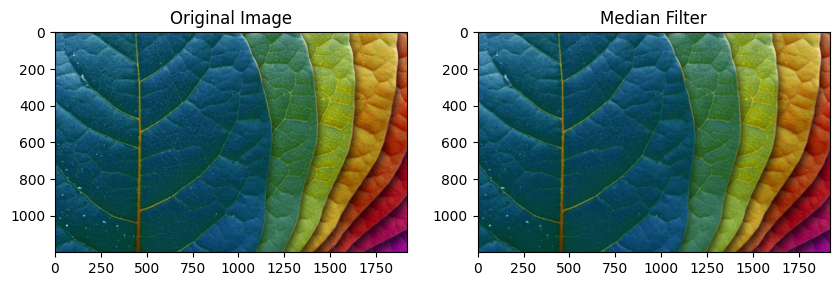

In [ ]:
#ENTER YOUR CODE HERE
image_path = '/content/nature-colored-leaves-backgrounds-wallpapers.jpg'
image = cv2.imread(image_path)
median_filter = apply_filter(image, cv2.medianBlur, 5)
display_images(image, median_filter, 'Median')


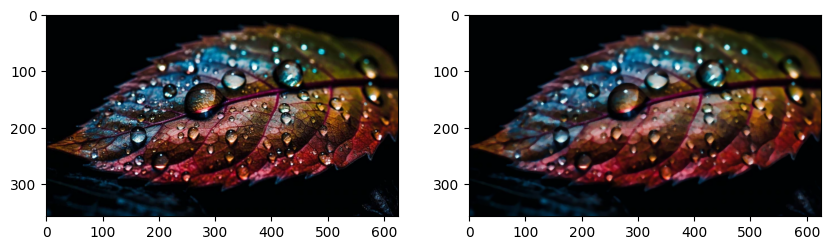

The nice images were for fun.

**Blurring is actually used for noise removal. Demonstrate.**

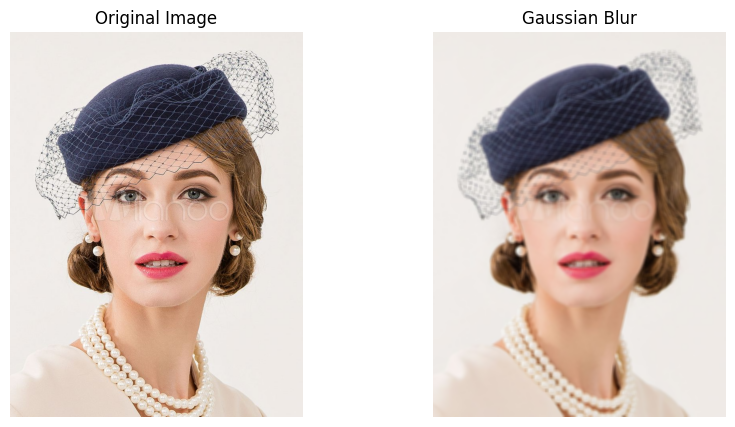

In [44]:
#ENTER YOUR CODE HERE
import cv2
import matplotlib.pyplot as plt

def display_images(original, processed, title):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    axes[1].imshow(cv2.cvtColor(processed, cv2.COLOR_BGR2RGB))
    axes[1].set_title(title)
    axes[1].axis('off')

    plt.show()

image_path = '/content/9a59265c6f21f39300cf2d6e7d093960.jpg'
image = cv2.imread(image_path)

# Apply Gaussian Blur
blurred_image = cv2.GaussianBlur(image, (9, 9), 10.0)

display_images(image, blurred_image, 'Gaussian Blur')

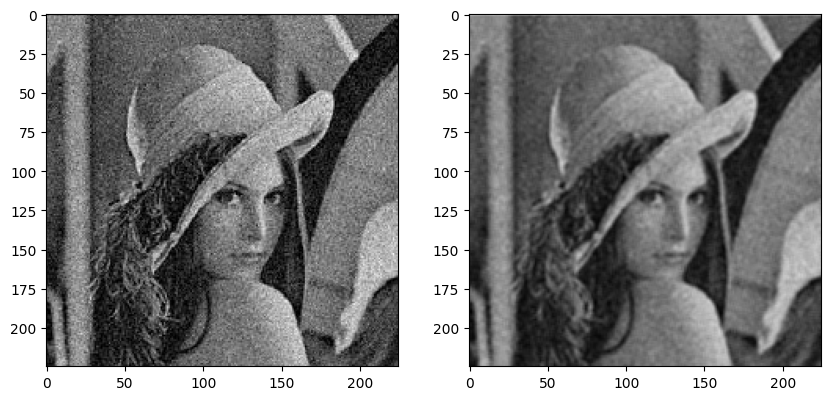

**Unsharp Masking**

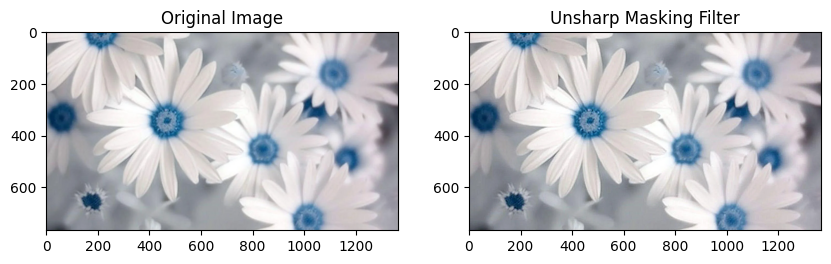

In [ ]:
#ENTER YOUR CODE HERE
image_path = '/content/3933710.webp'
image = cv2.imread(image_path)
gaussian = cv2.GaussianBlur(image, (9, 9), 10.0)
unsharp_image = cv2.addWeighted(image, 1.5, gaussian, -0.5, 0)
display_images(image, unsharp_image, 'Unsharp Masking')

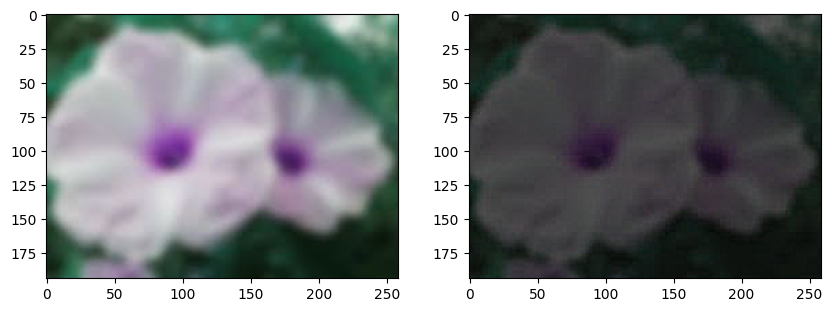

**Prewitt Horizontal Filter**

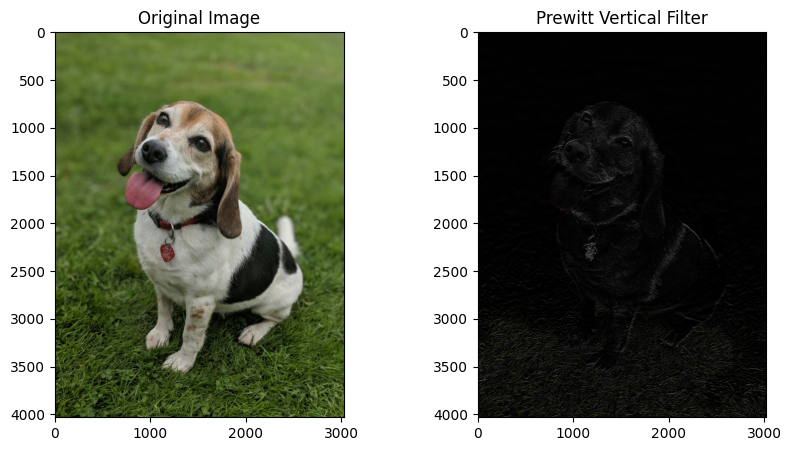

In [ ]:
#ENTER YOUR CODE HERE
image_path = '/content/pexels-tyler-de-sousa-16869201-6599748.jpg'
image = cv2.imread(image_path)

prewitt_horizontal = np.array([[1, 1, 1],
                             [0, 0, 0],
                             [-1, -1, -1]])

# Apply the Prewitt vertical filter using cv2.filter2D
filtered_image = cv2.filter2D(image, -1, prewitt_horizontal)
display_images(image, filtered_image, 'Prewitt Vertical')

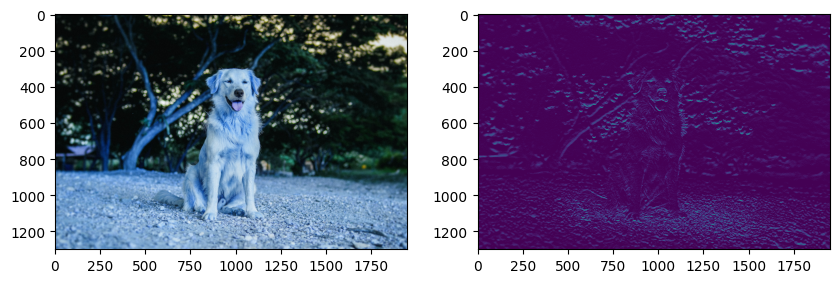

**Prewitt Vertical Filter**

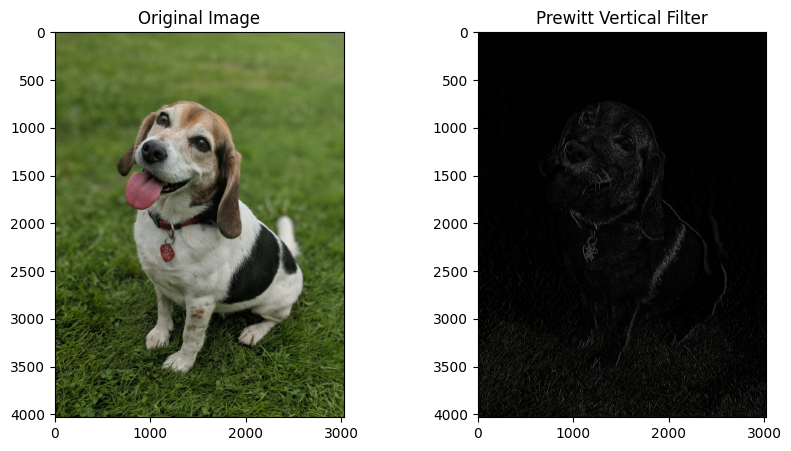

In [ ]:
#ENTER YOUR CODE HERE
image_path = '/content/pexels-tyler-de-sousa-16869201-6599748.jpg'
image = cv2.imread(image_path)
prewitt_vertical = np.array([[1, 0, -1],
                             [1, 0, -1],
                             [1, 0, -1]])


filtered_image = cv2.filter2D(image, -1, prewitt_vertical)
display_images(image, filtered_image, 'Prewitt Vertical')

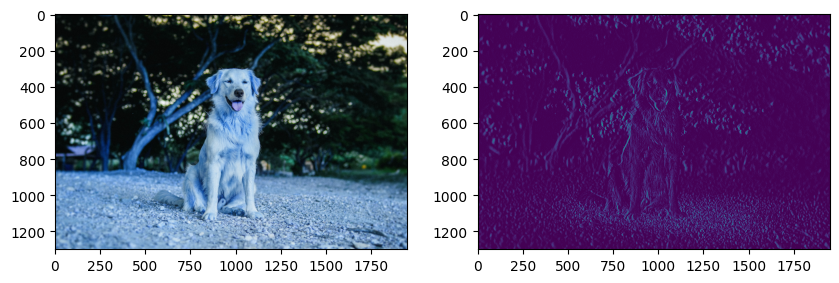

**Combined Prewitt**

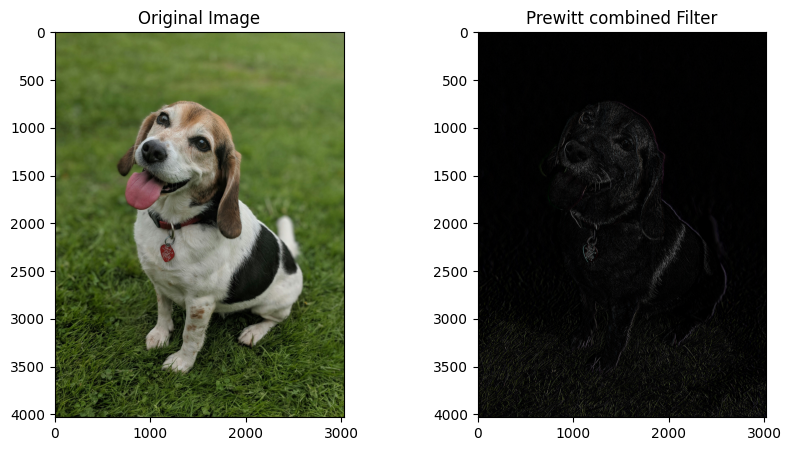

In [41]:
#ENTER YOUR CODE HERE
image_path = '/content/pexels-tyler-de-sousa-16869201-6599748.jpg'
image = cv2.imread(image_path)
prewitt_combined = np.array([[1, 0, -1],
                             [1, 0, -1],
                             [1, 0, -1]])


filtered_image = cv2.filter2D(image, -1, prewitt_combined)
display_images(image, filtered_image, 'Prewitt combined')

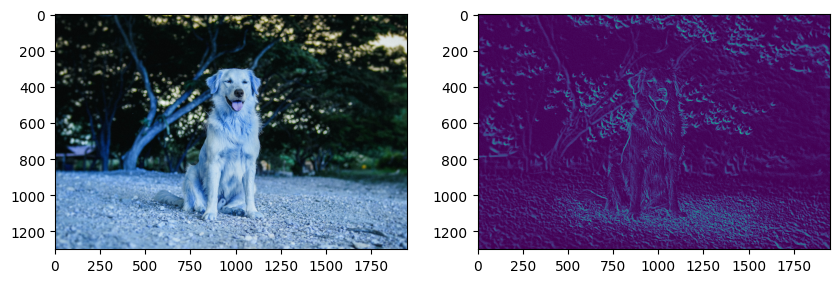

**Sobel Filter**

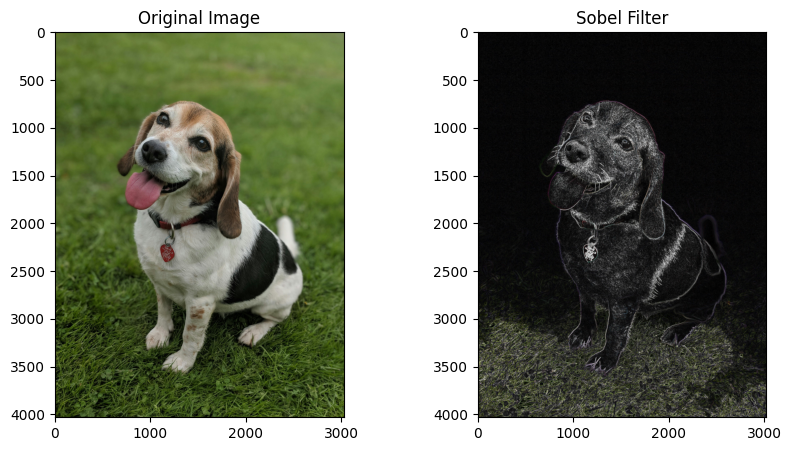

In [ ]:
#ENTER YOUR CODE HERE
image_path = '/content/pexels-tyler-de-sousa-16869201-6599748.jpg'
image = cv2.imread(image_path)
sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
sobel = np.sqrt(sobelx**2 + sobely**2)
sobel = cv2.convertScaleAbs(sobel)
display_images(image, sobel, 'Sobel')

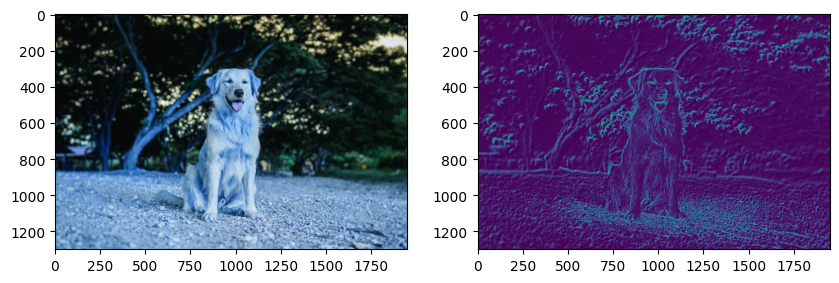

As you can see, the quality of sobel filter is better than that of combined prewitt.

**Laplacian Filter**

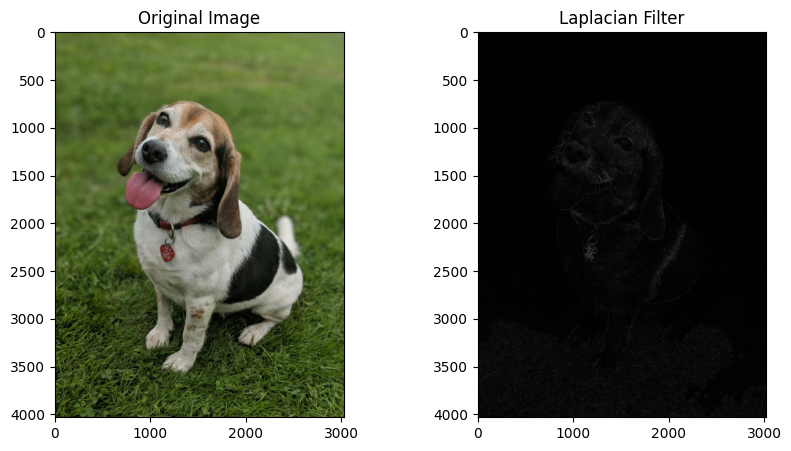

In [ ]:
#ENTER YOUR CODE HERE
image_path = '/content/pexels-tyler-de-sousa-16869201-6599748.jpg'
image = cv2.imread(image_path)
laplacian_filter = cv2.Laplacian(image, cv2.CV_64F)
laplacian_filter = cv2.convertScaleAbs(laplacian_filter)
display_images(image, laplacian_filter, 'Laplacian')

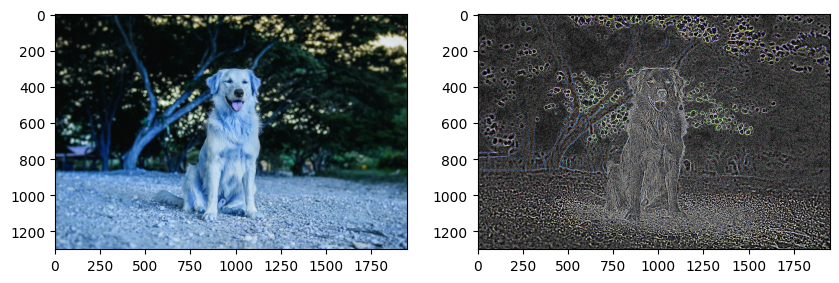

### BUILDING A BASIC MODEL
Perhaps the most basic CNN application is handwritten digit recognition. We will develop a model for the same.

In [1]:
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
(X_train,y_train),(X_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


**What is the no. of elements in the training and testing datasets?**

In [2]:
#ENTER YOUR CODE HERE



num_train_elements = len(X_train)
num_test_elements = len(X_test)

print(f'Number of elements in the training dataset: {num_train_elements}')
print(f'Number of elements in the testing dataset: {num_test_elements}')

Number of elements in the training dataset: 60000
Number of elements in the testing dataset: 10000


**What are the labels in the dataset?**

In [6]:
#ENTER YOUR CODE HERE
unique_labels = np.unique(y_train)
print(unique_labels)

[0 1 2 3 4 5 6 7 8 9]


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

**Visualise one image for each label.**

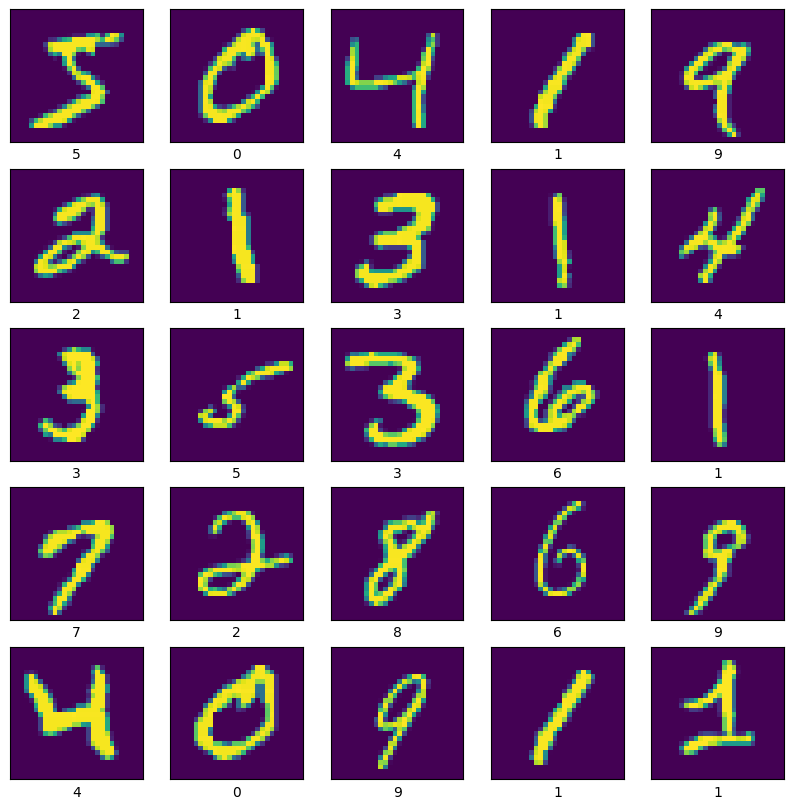

In [7]:
#ENTER YOUR CODE HERE

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.axis('on')
    plt.imshow(X_train[i])

    plt.xlabel(y_train[i])
plt.show()

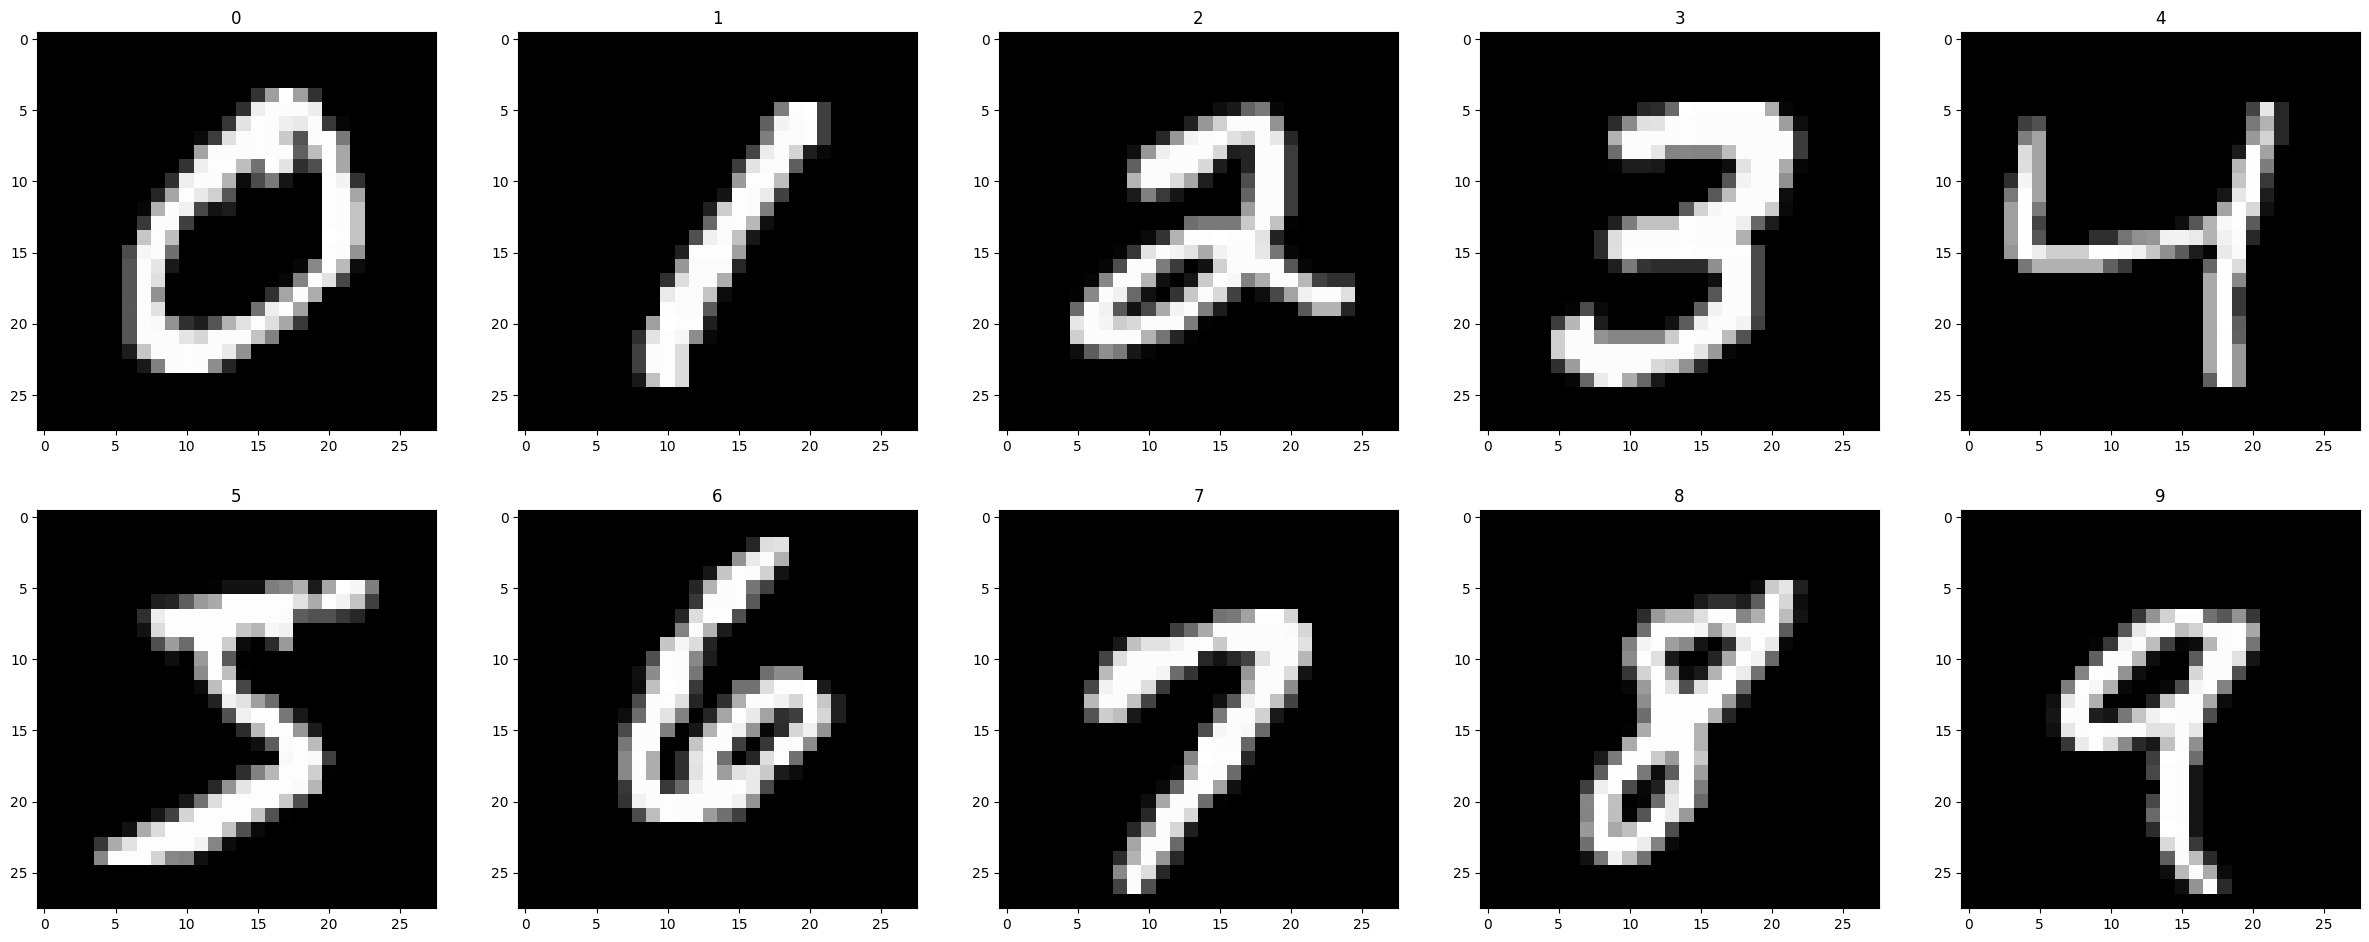

**One-hot encode the y labels.**

In [8]:
#ENTER YOUR CODE HERE
from sklearn.preprocessing import OneHotEncoder


encoder = OneHotEncoder(sparse=False, categories='auto')


labels_y = y_train.reshape(-1, 1)


labels_one_hot = encoder.fit_transform(labels_y)


labels_one_hot[:10]

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

**Let's see what every image looks like! Print the pixel array of any one image, and then display the image as well.**

The shape of each element is:(28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0 

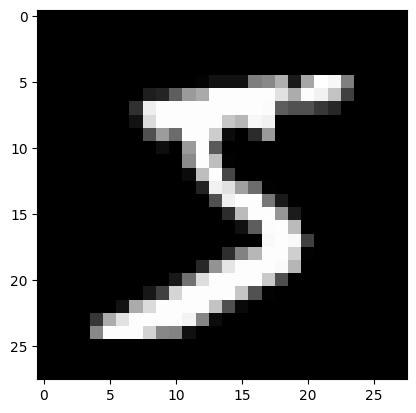

In [9]:
#ENTER YOUR CODE HERE
print(f'The shape of each element is:{X_train[0].shape}')
print(X_train[0])
plt.imshow(X_train[0], cmap='gray')



The shape of each element is: (28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0

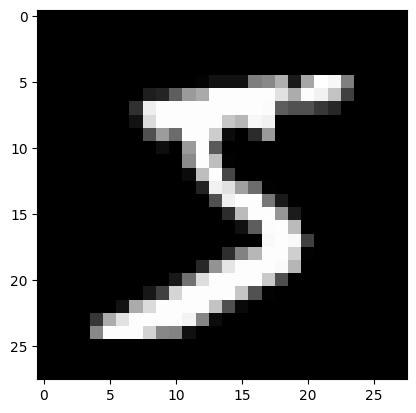

**Change the dimension of the training and testing datasets for it to become a 3D one. Remember this is a grayscale image.**

In [10]:
#ENTER YOUR CODE HERE
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2], 1)
X_test= X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

In [11]:
print(X_train.shape[1:])


(28, 28, 1)


**The last step in the preparation of the dataset is normalisation of the pixel values.**

In [12]:
#ENTER YOUR CODE HERE
X_train, X_test= X_train / 255.0, X_test / 255.0

**Now we begin training. Compile a model that has 1 convolutional layer with 32 filters, followed by a max pooling layer, followed by another convolutional layer with 64 filters, followed by a max pooling layer and finally dense layers.**

In [13]:
#ENTER YOUR CODE HERE
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


model = Sequential()


model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())


model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

**Compile the model with Adam optimizer, and a suitable loss function. Use accuracy as the metric for training.**

In [14]:
#ENTER YOUR CODE HERE
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**Now split the dataset into a validation part.**

In [15]:
#ENTER YOUR CODE HERE
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

**Fit the model and plot the training history.**

Epoch 1/10
1500/1500 [==============================] - 31s 20ms/step - loss: 0.1491 - accuracy: 0.9549 - val_loss: 0.0554 - val_accuracy: 0.9844
Epoch 2/10
1500/1500 [==============================] - 30s 20ms/step - loss: 0.0466 - accuracy: 0.9857 - val_loss: 0.0428 - val_accuracy: 0.9872
Epoch 3/10
1500/1500 [==============================] - 34s 23ms/step - loss: 0.0317 - accuracy: 0.9900 - val_loss: 0.0448 - val_accuracy: 0.9874
Epoch 4/10
1500/1500 [==============================] - 30s 20ms/step - loss: 0.0220 - accuracy: 0.9931 - val_loss: 0.0369 - val_accuracy: 0.9893
Epoch 5/10
1500/1500 [==============================] - 31s 21ms/step - loss: 0.0168 - accuracy: 0.9947 - val_loss: 0.0397 - val_accuracy: 0.9874
Epoch 6/10
1500/1500 [==============================] - 31s 21ms/step - loss: 0.0127 - accuracy: 0.9959 - val_loss: 0.0369 - val_accuracy: 0.9900
Epoch 7/10
1500/1500 [==============================] - 32s 22ms/step - loss: 0.0097 - accuracy: 0.9967 - val_loss: 0.0504 -

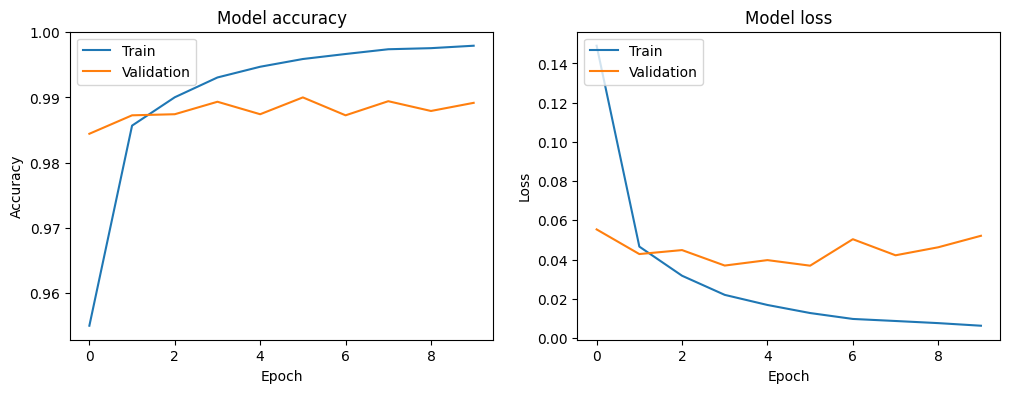

In [23]:
#ENTER YOUR CODE HERE
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_test, y_test))
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

Epoch 1/10
1500/1500 [==============================] - 43s 29ms/step - loss: 0.0720 - accuracy: 0.9775 - val_loss: 0.0608 - val_accuracy: 0.9815
Epoch 2/10
1500/1500 [==============================] - 43s 29ms/step - loss: 0.0504 - accuracy: 0.9841 - val_loss: 0.0514 - val_accuracy: 0.9851
Epoch 3/10
1500/1500 [==============================] - 46s 31ms/step - loss: 0.0393 - accuracy: 0.9874 - val_loss: 0.0550 - val_accuracy: 0.9847
Epoch 4/10
1500/1500 [==============================] - 45s 30ms/step - loss: 0.0324 - accuracy: 0.9898 - val_loss: 0.0389 - val_accuracy: 0.9878
Epoch 5/10
1500/1500 [==============================] - 45s 30ms/step - loss: 0.0256 - accuracy: 0.9917 - val_loss: 0.0494 - val_accuracy: 0.9862
Epoch 6/10
1500/1500 [==============================] - 44s 29ms/step - loss: 0.0207 - accuracy: 0.9935 - val_loss: 0.0418 - val_accuracy: 0.9880
Epoch 7/10
1500/1500 [==============================] - 45s 30ms/step - loss: 0.0177 - accuracy: 0.9945 - val_loss: 0.0377 -

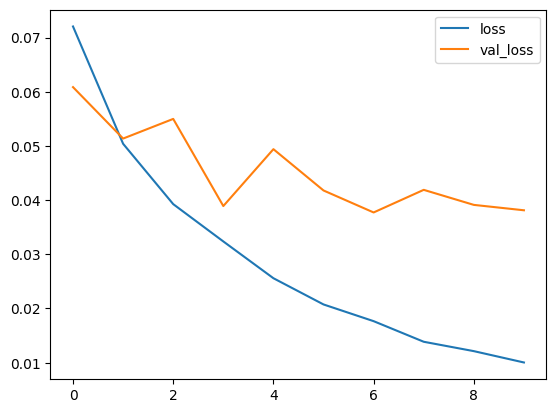

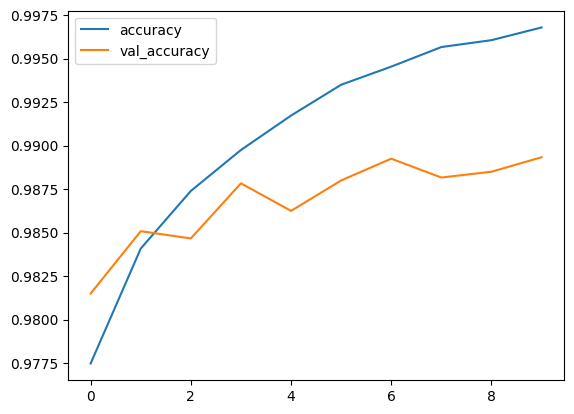

**Now test your model on the training dataset and print the classification matrix.**

In [16]:
#ENTER YOUR CODE HERE
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


y_pred_train = model.predict(X_train)

if y_pred_train.ndim > 1:
    y_pred_train_classes = np.argmax(y_pred_train, axis=1)
else:
    y_pred_train_classes = y_pred_train


if y_train.ndim > 1:
    y_true_train = np.argmax(y_train, axis=1)
else:
    y_true_train = y_train


conf_matrix = confusion_matrix(y_true_train, y_pred_train_classes)


print("Classification Report:\n", classification_report(y_true_train, y_pred_train_classes))

1500/1500 [==============================] - 8s 5ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.15      0.41      0.22      4748
           1       0.16      0.34      0.22      5420
           2       0.00      0.00      0.00      4784
           3       0.00      0.00      0.00      4912
           4       0.07      0.00      0.00      4666
           5       0.01      0.00      0.00      4317
           6       0.03      0.08      0.05      4741
           7       0.05      0.11      0.06      4966
           8       0.00      0.00      0.00      4691
           9       0.00      0.00      0.00      4755

    accuracy                           0.10     48000
   macro avg       0.05      0.09      0.05     48000
weighted avg       0.05      0.10      0.06     48000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


313/313 [==============================] - 6s 19ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      1.00      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



**Lets visualise the prediction, along with the input now.**

375/375 [==============================] - 2s 6ms/step


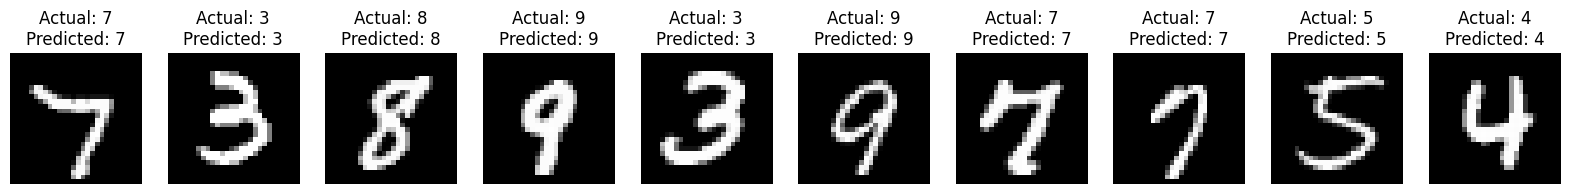

In [39]:
#ENTER YOUR CODE HERE
predictions = model.predict(X_test)

def plot_images_with_predictions(images, true_labels, predicted_labels, num_images=10):
    plt.figure(figsize=(20, 4))
    for i in range(num_images):
        ax = plt.subplot(2, num_images, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f"Actual: {true_labels[i]}\nPredicted: {np.argmax(predicted_labels[i])}")
        plt.axis('off')



plot_images_with_predictions(X_test, y_test, predictions, num_images=10)


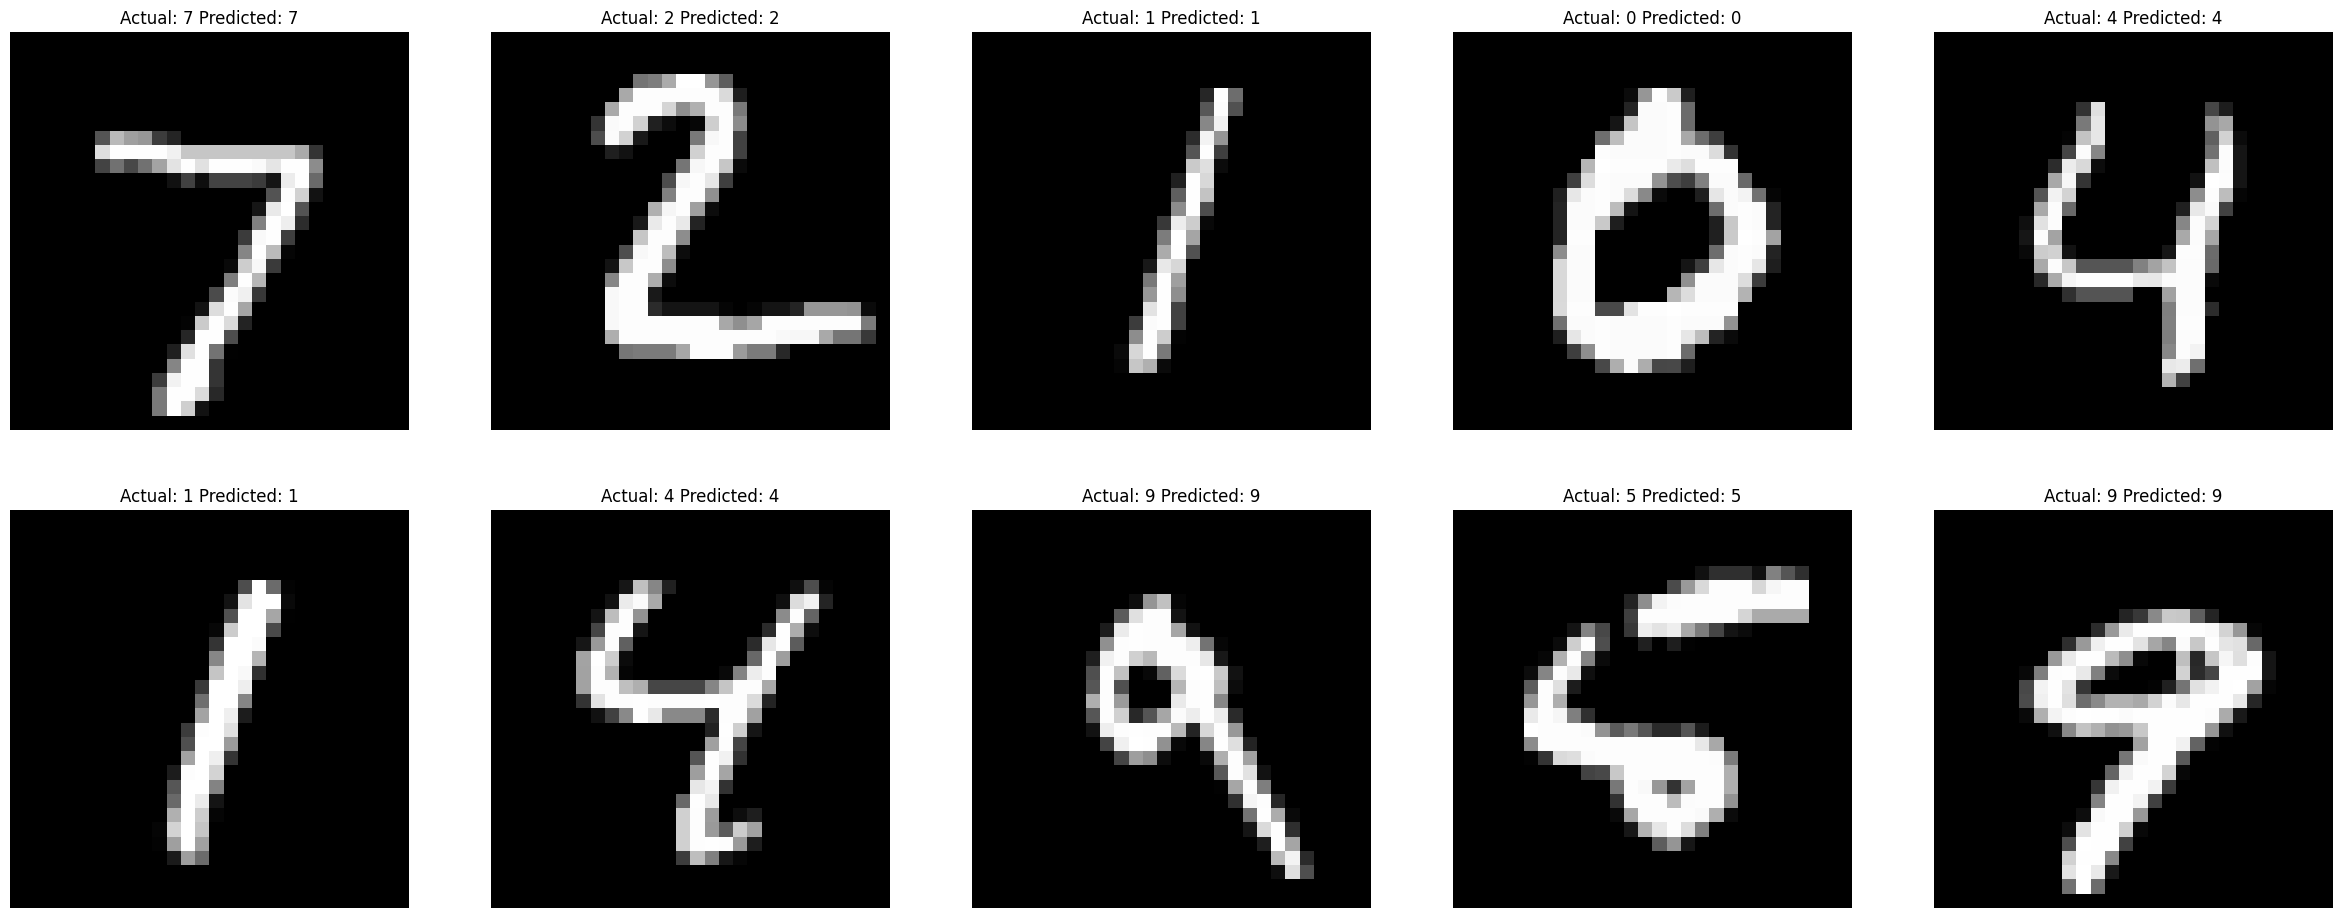

**But what did the convolution layers do? Lets visualise the outputs of filters for the first test image.**

1/1 [==============================] - 0s 70ms/step


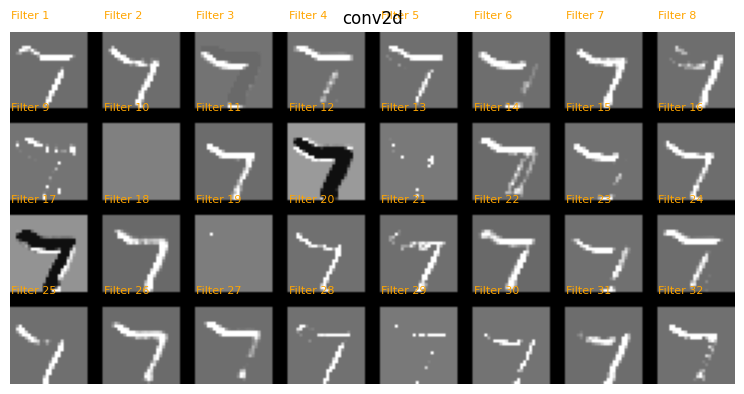

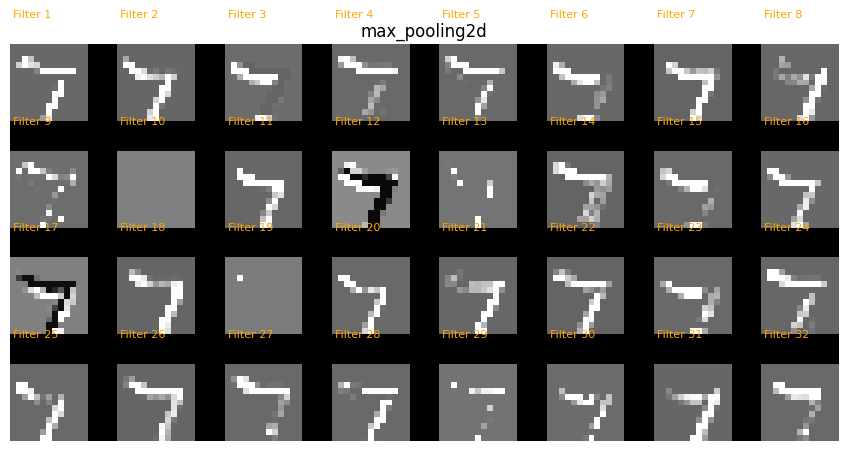

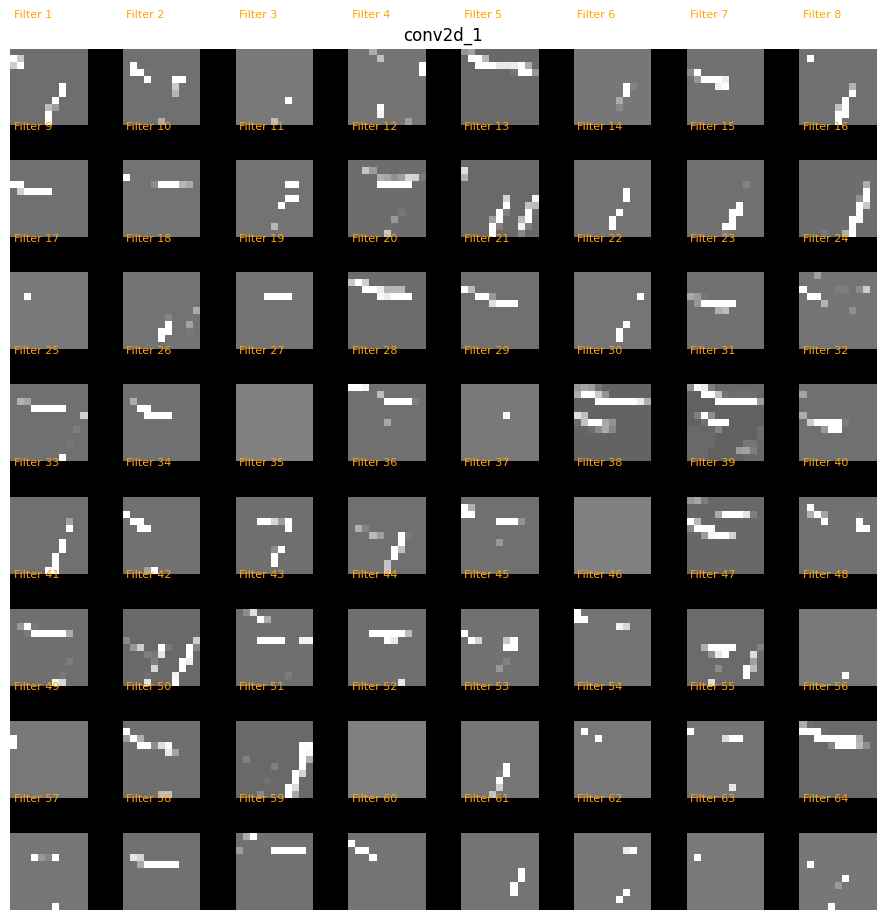

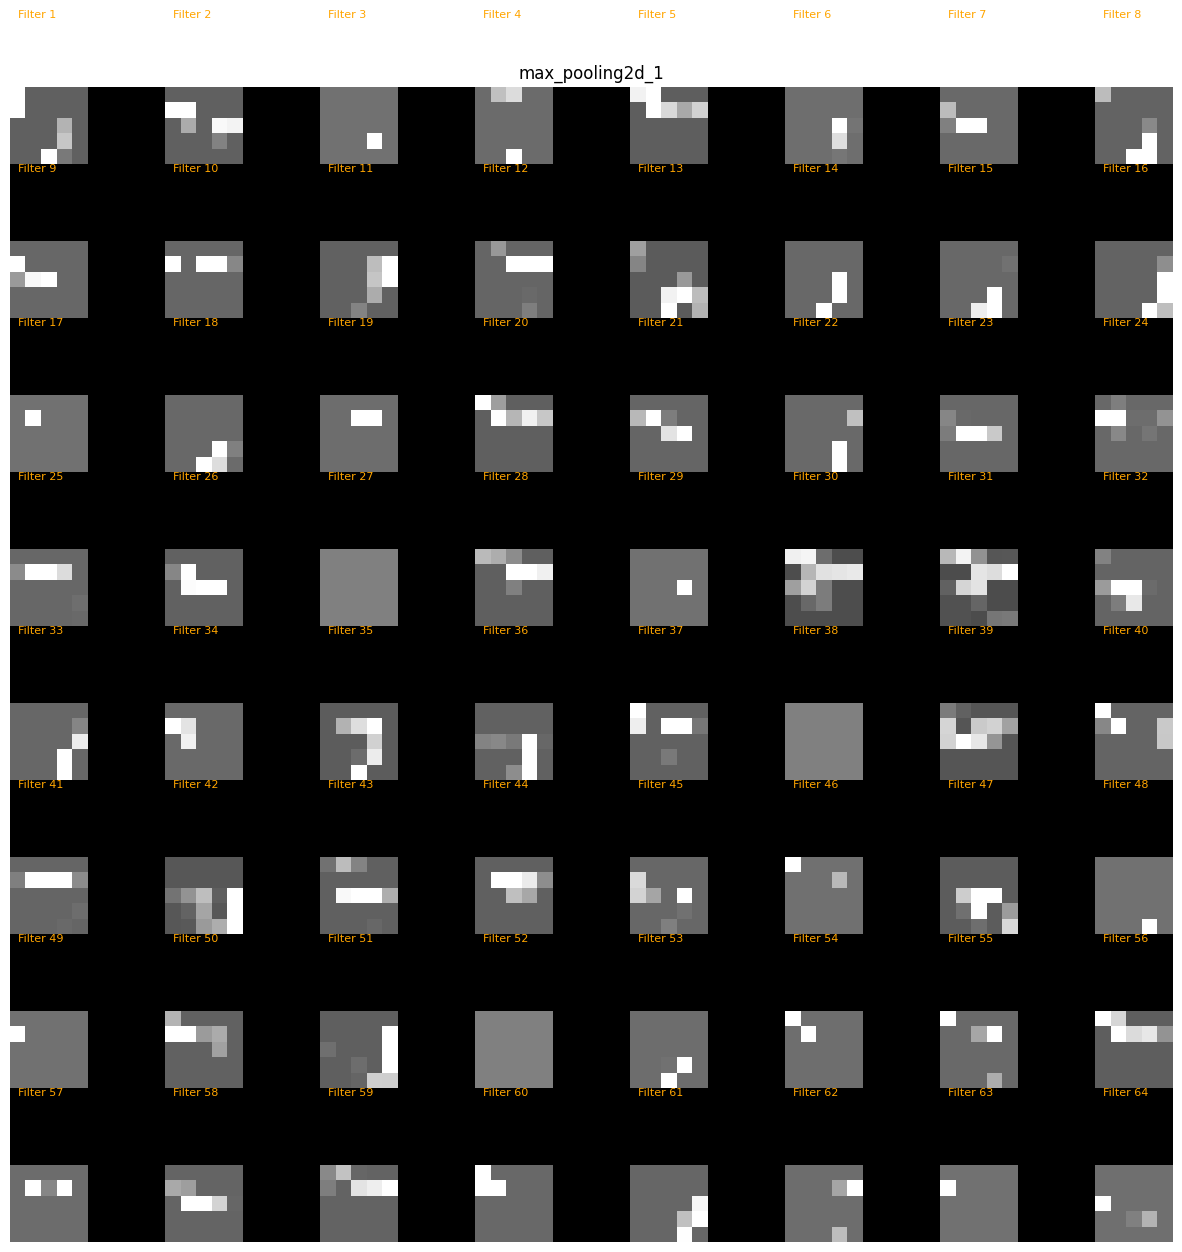

In [38]:
#ENTER YOUR CODE HERE
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
test_image = X_test[0]



layer_outputs = [layer.output for layer in model.layers[:4]]
activation_model = Model(inputs=model.input, outputs=layer_outputs)


activations = activation_model.predict(test_image.reshape(1, 28, 28, 1))


layer_names = [layer.name for layer in model.layers[:4]]

images_per_row = 8
padding = 5

for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]

    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols + padding * (n_cols - 1), images_per_row * size + padding * (images_per_row - 1)))

    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0, :, :, col * images_per_row + row]
            channel_image -= channel_image.mean()
            std = channel_image.std() + 1e-5
            channel_image /= std
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            start_col = col * (size + padding)
            start_row = row * (size + padding)
            display_grid[start_col: start_col + size, start_row: start_row + size] = channel_image

    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.axis('off')
    plt.imshow(display_grid, aspect='auto', cmap='gray')


    for i in range(n_features):
        row = i // images_per_row
        col = i % images_per_row
        plt.text(col * (size + padding), row * (size + padding) - 5, f'Filter {i + 1}', color='orange', fontsize=8)

plt.show()

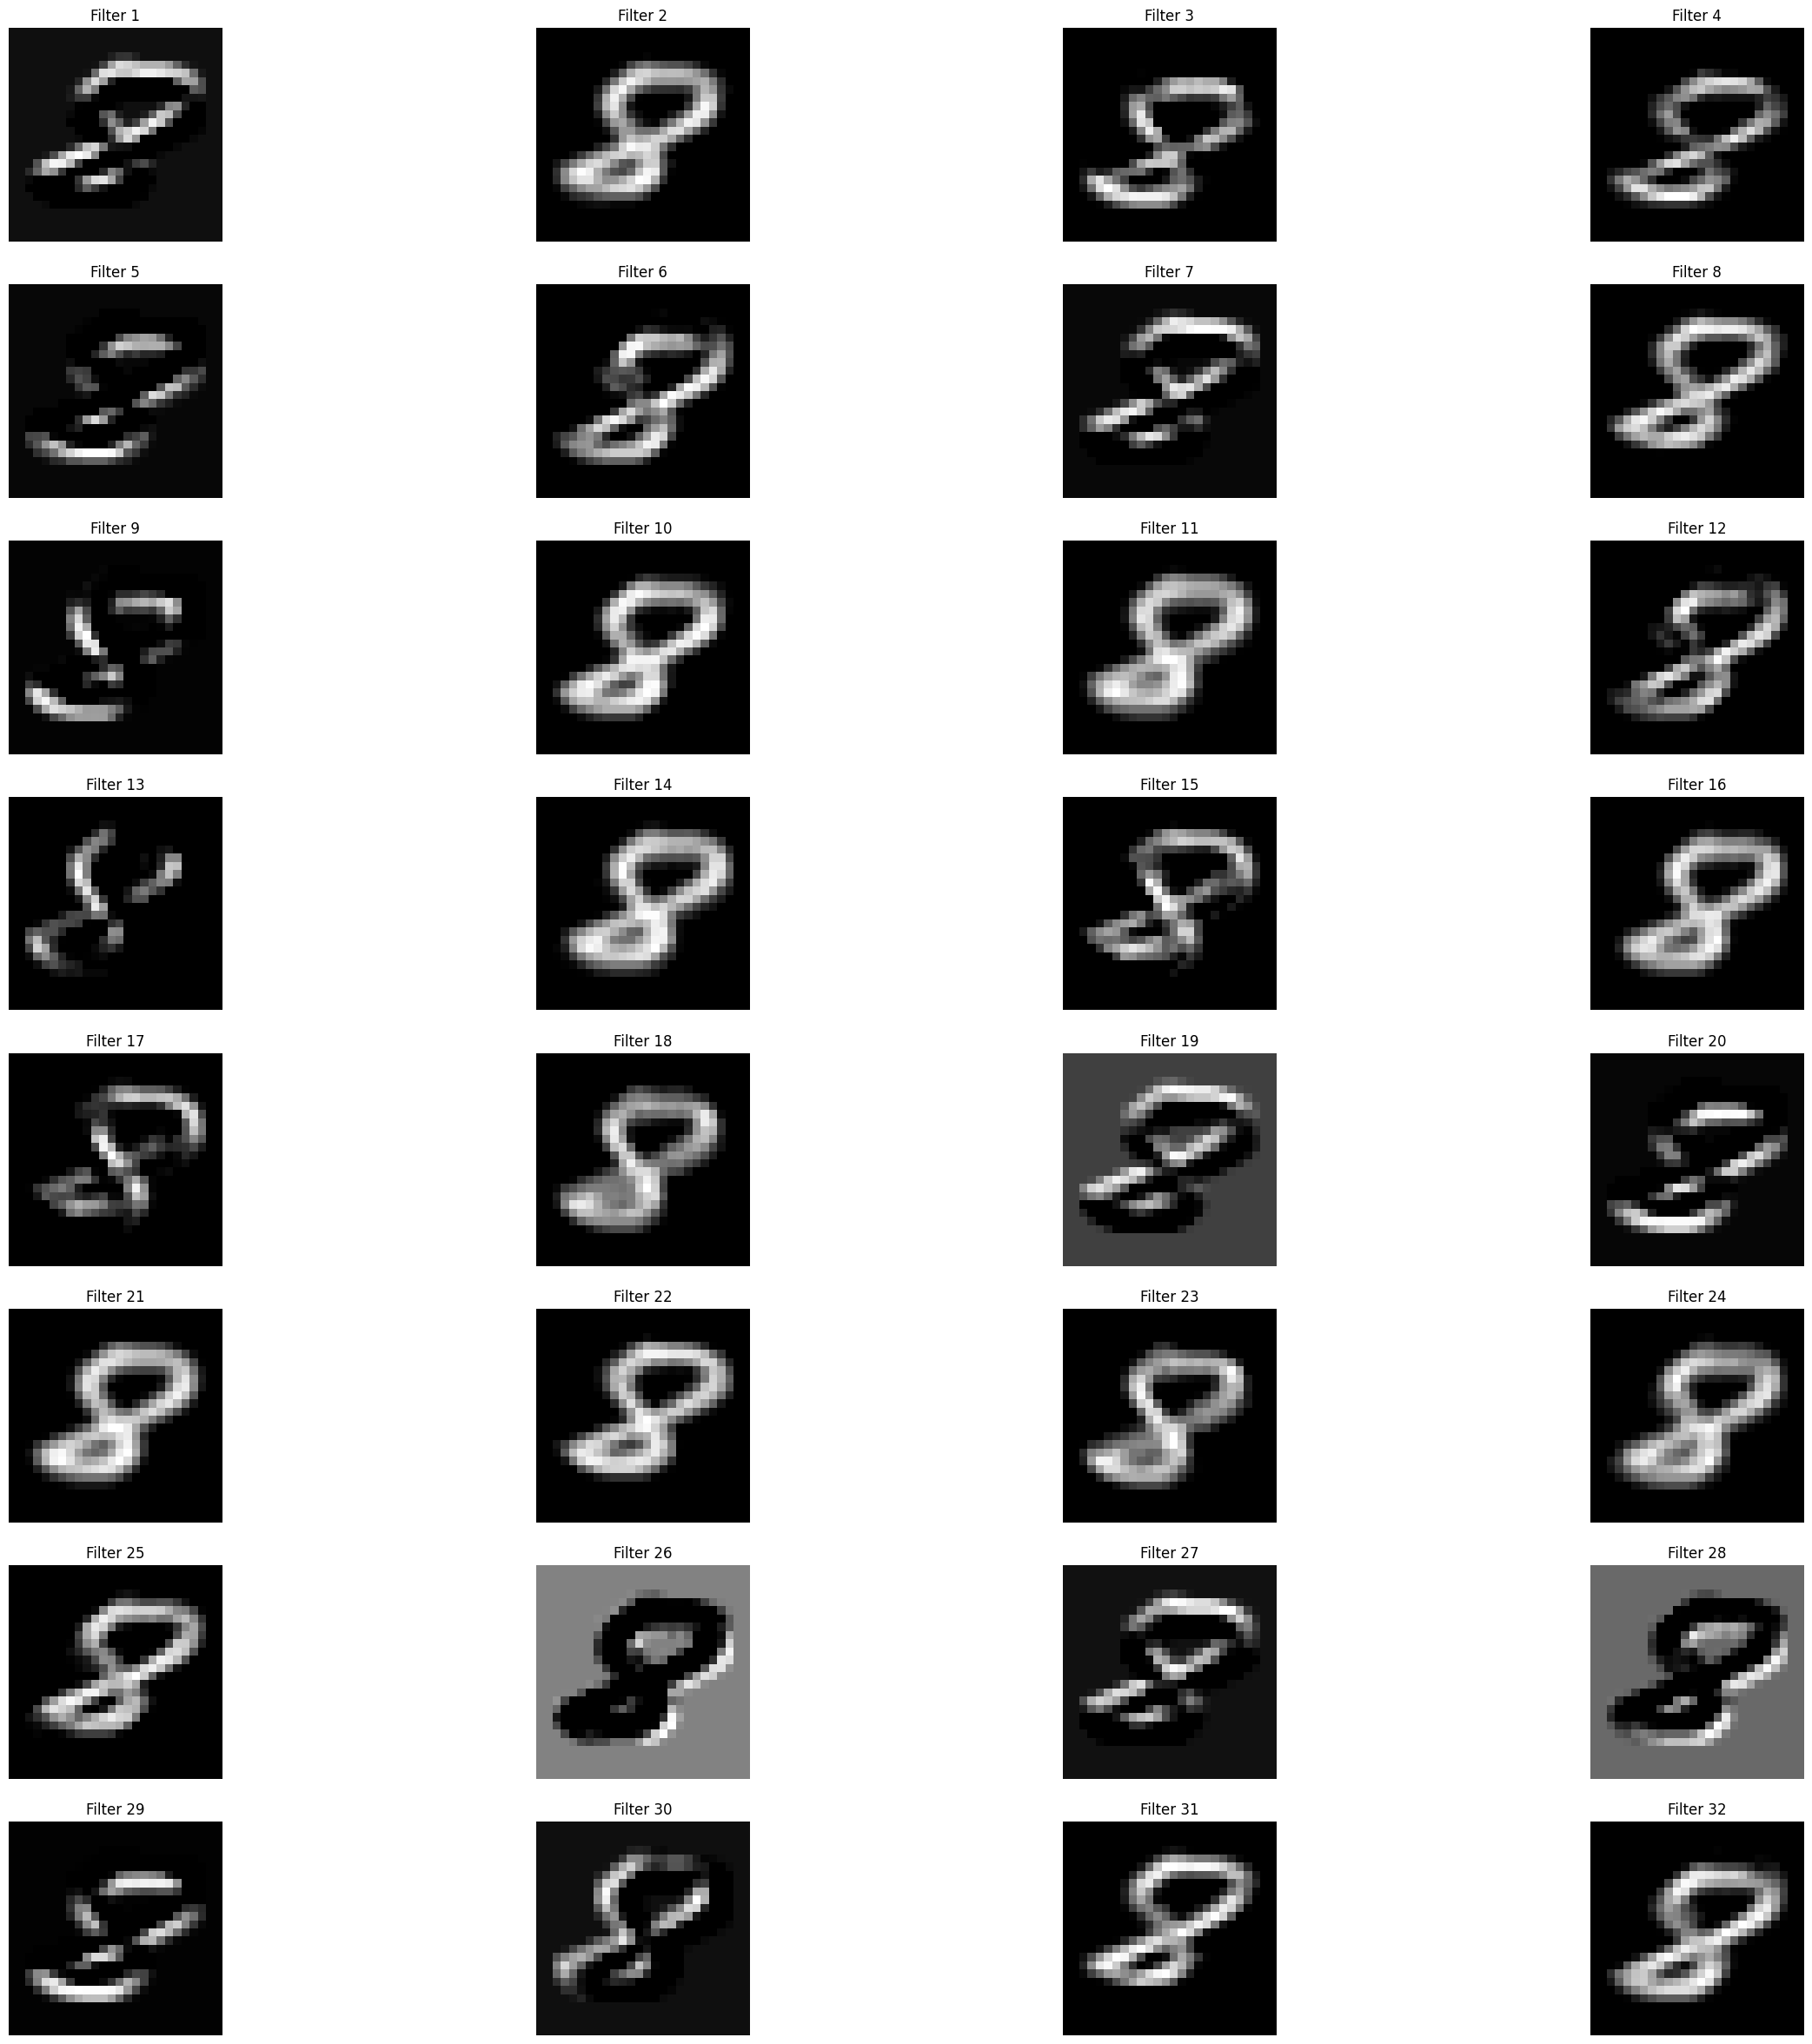

**Do the same for the output of the max pooling layer.**

In [ ]:
#ENTER YOUR CODE HERE
# done above

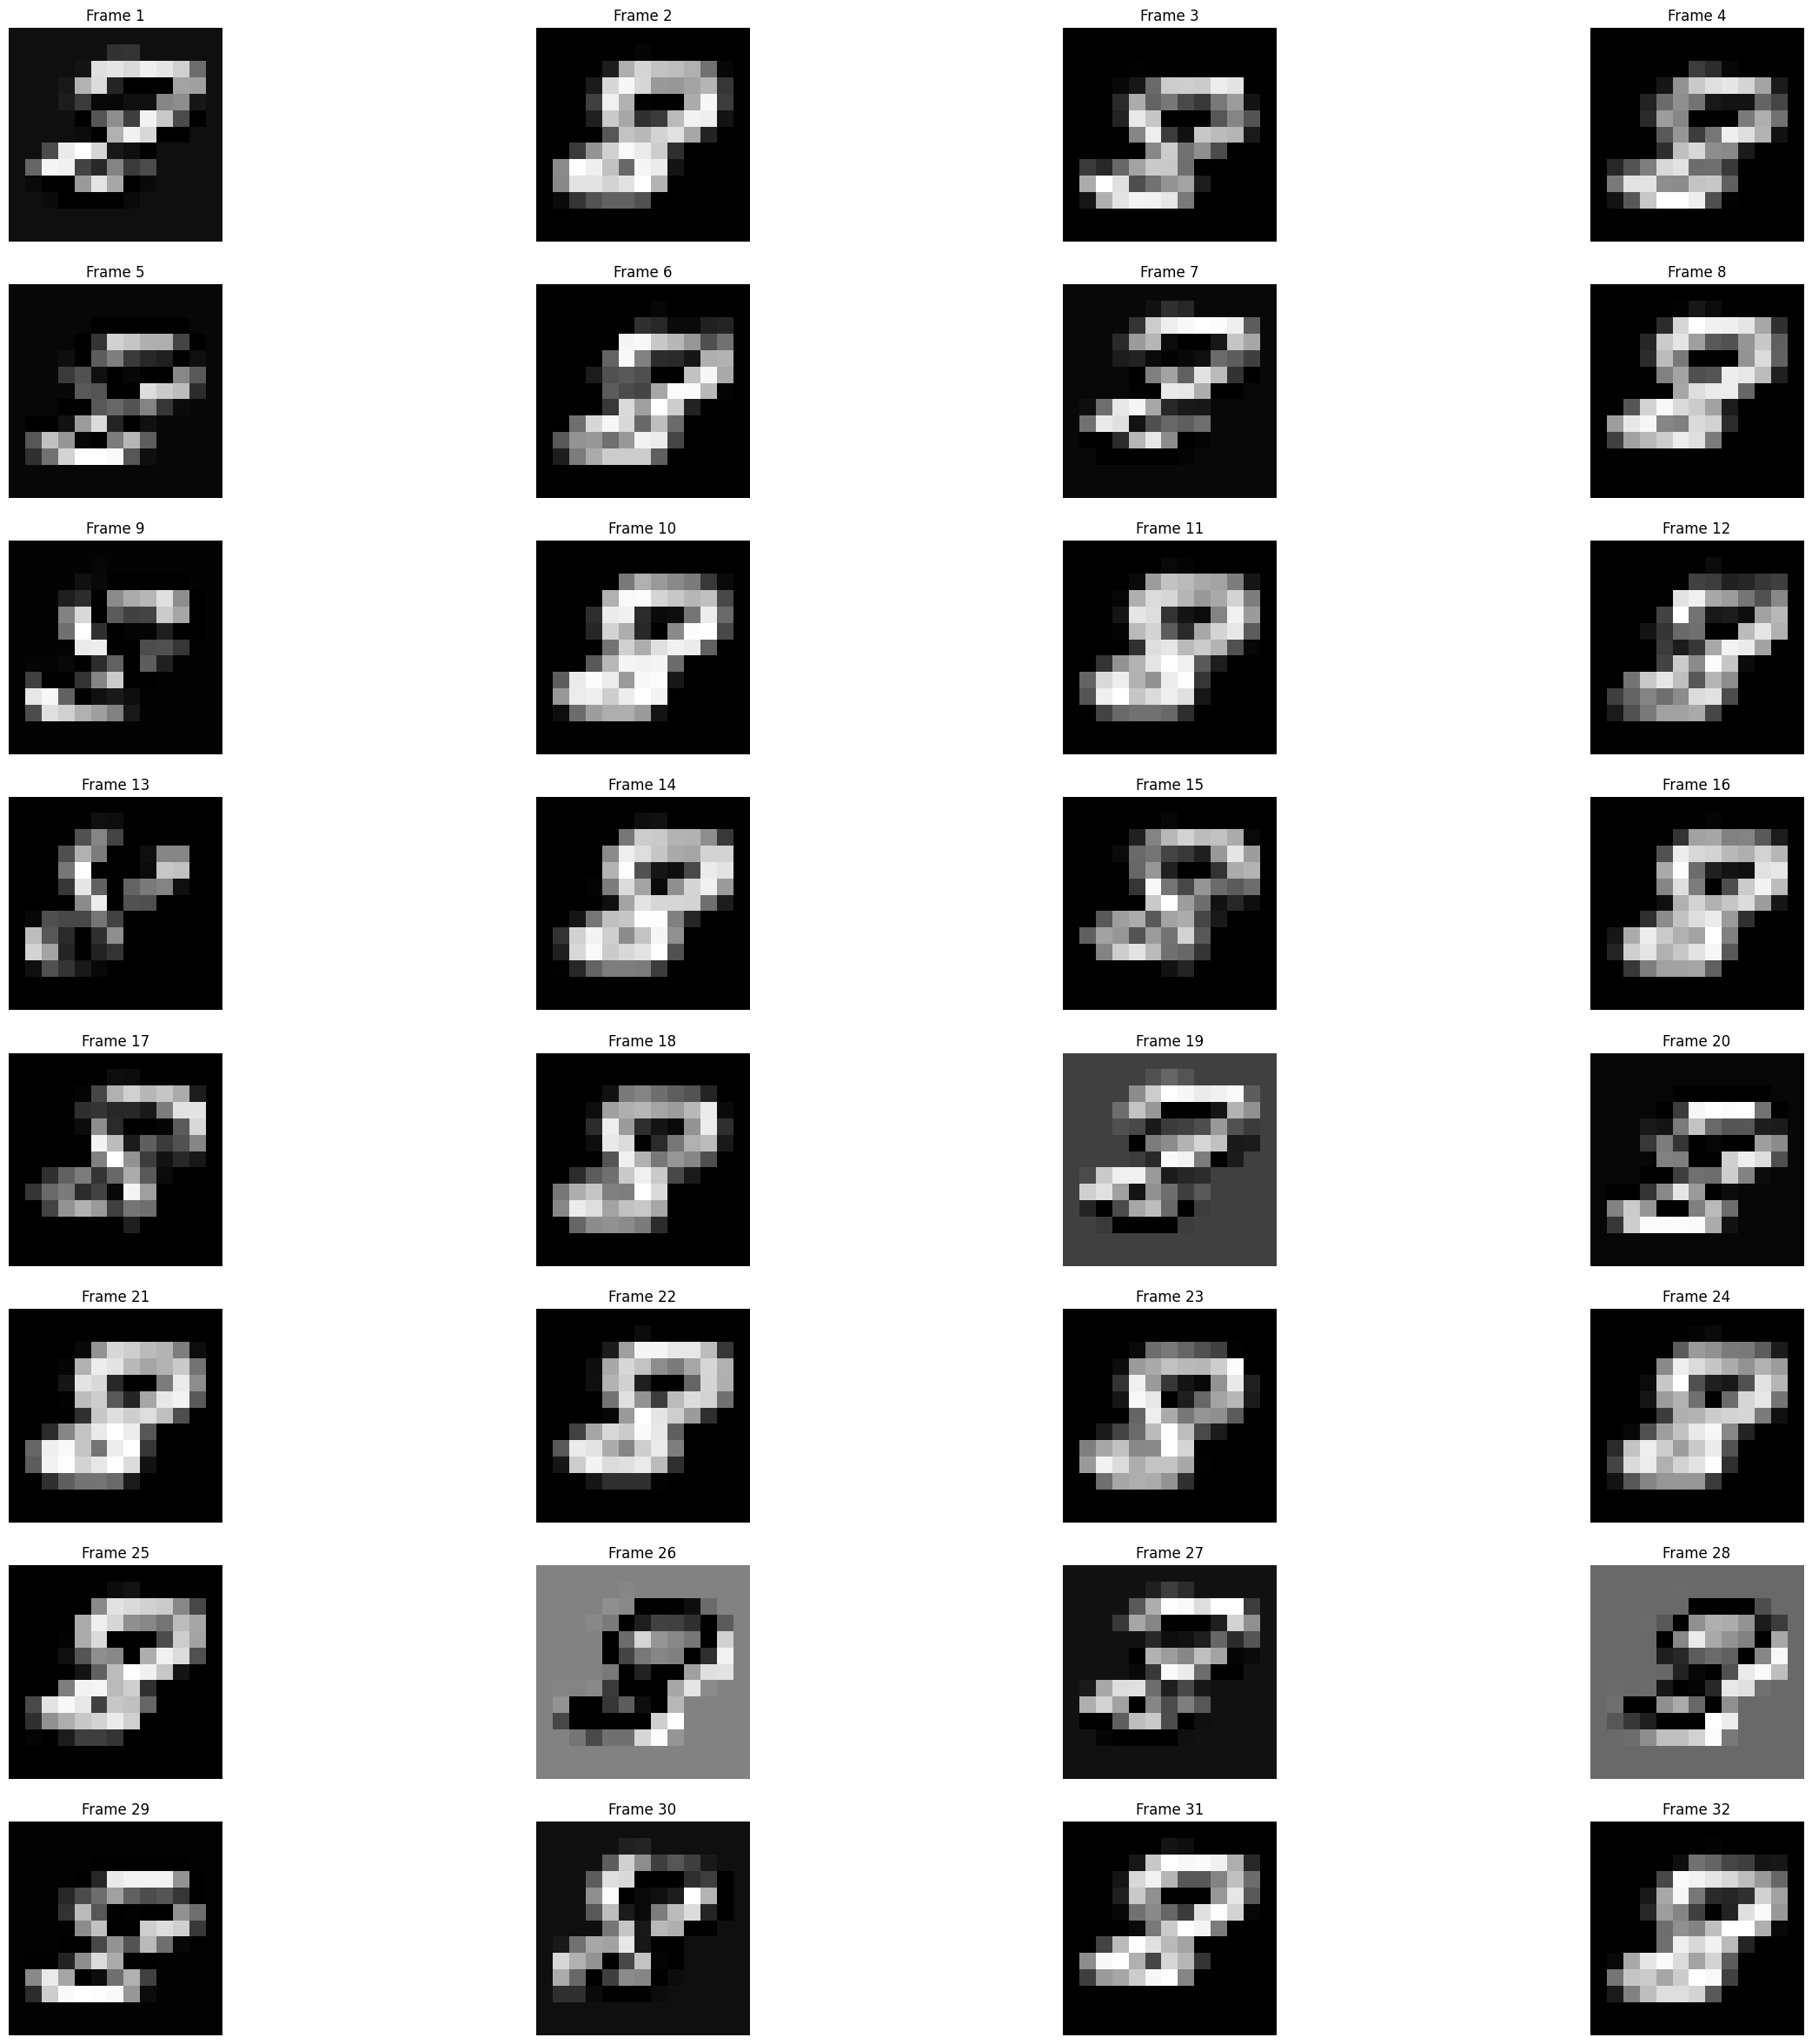

**Output of the third convolution layer.**

In [ ]:
#ENTER YOUR CODE HERE
# done above

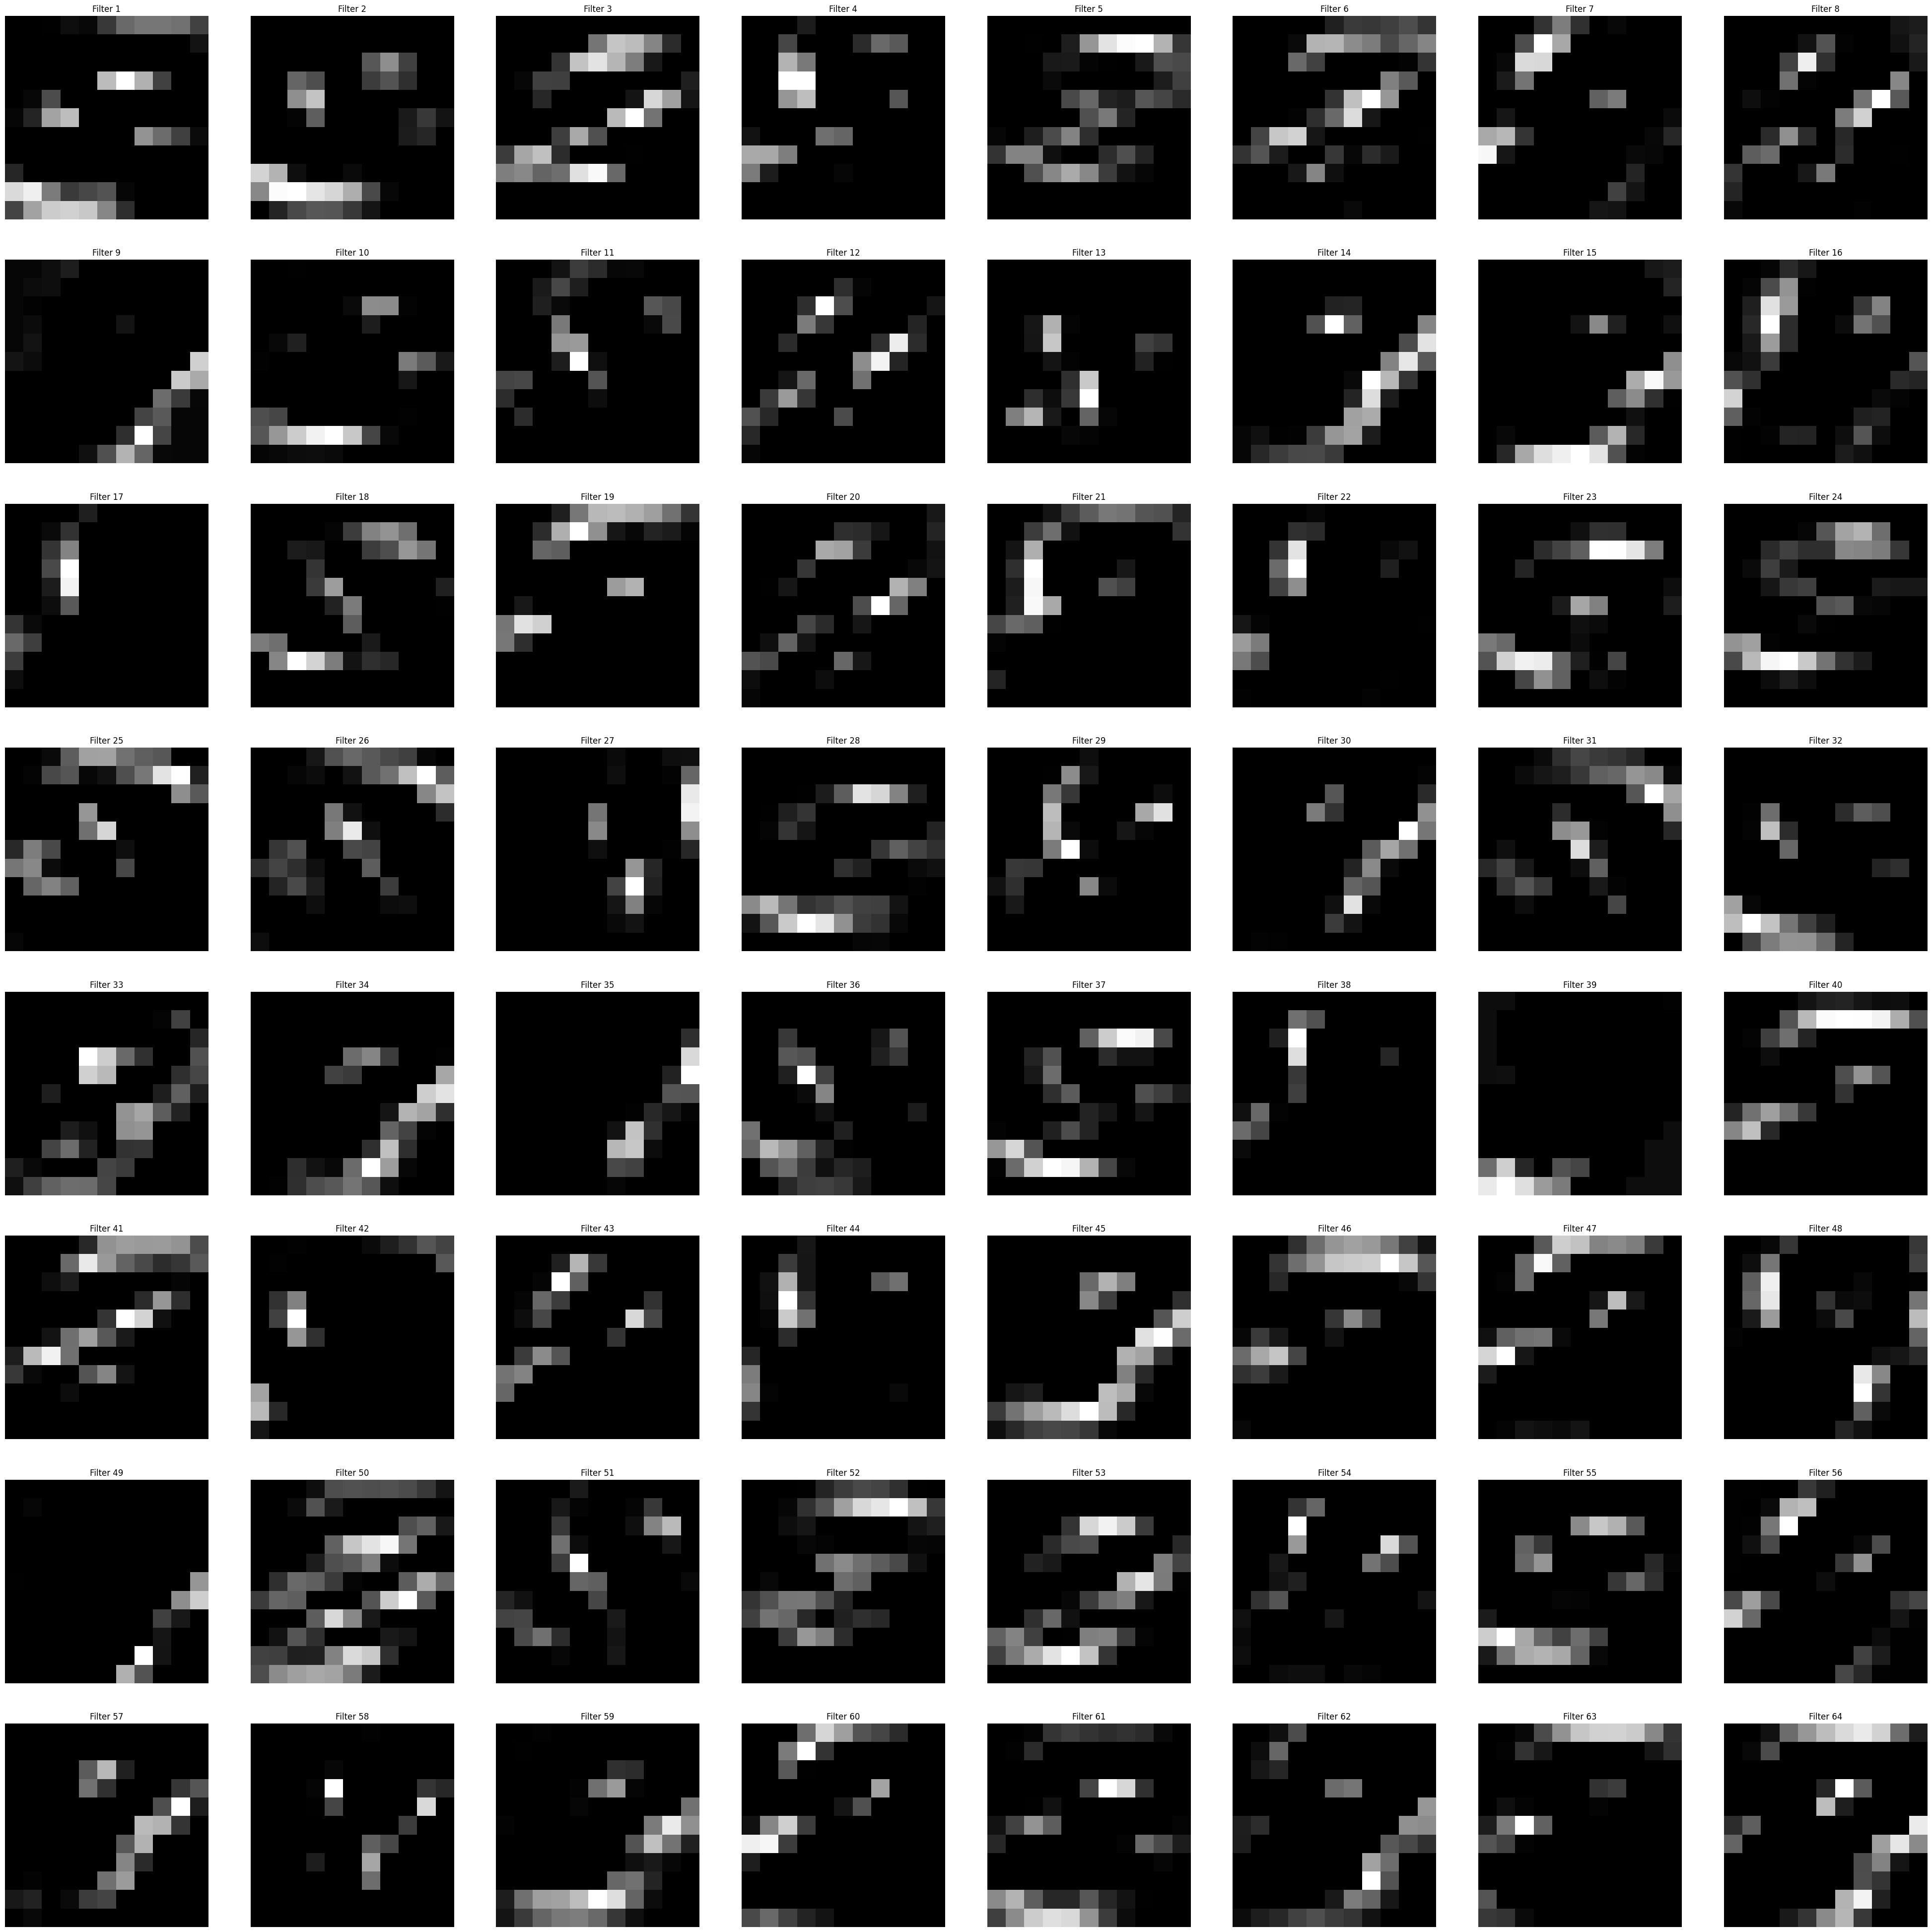

**It is now clearly visible that the each filter is extracting a particular feature.**